In [28]:
from generate_paths import get_all_files
import six.moves.cPickle as pickle
import numpy as np
import copy
from joblib import Parallel, delayed

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [30]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [31]:
from hmmlearn import hmm

In [32]:
feat_name = 'sections_start'

In [33]:
features = []
with open(feat_name+'.pkl', 'rb') as pickle_file:
    try:
       for _ in range(500000):
            entry = pickle.load(pickle_file, encoding='bytes', fix_imports=True)
            features.append(entry)
    except EOFError:
        pass

In [34]:
data = map(lambda x: x[1], features)
data = list(filter(lambda x: 'year' in x and x['year']>=1965, data))
len(data)

247418

In [35]:
for entry in data:
    entry['sections_gap'] = np.diff(entry[feat_name])
data = list(filter(lambda x: len(x['sections_gap'])>=0, data))
len(data)

247418

In [36]:
granularity = 5
labels = list(map(lambda x: x['year'], data))
labels -= min(labels)
labels = np.array(list(map(int, labels)))
classes = list(map(lambda x: x//granularity, labels))

In [37]:
classes_to_data = {}
for i,entry in enumerate(data):
    cls = classes[i]
    classes_to_data.setdefault(cls, []).append(entry)
for cls in classes_to_data:
    classes_to_data[cls] = np.random.permutation(classes_to_data[cls])
min_len = min([len(x) for x in classes_to_data.values()])
uniform_data = np.array([subdata[:min_len] for subdata in classes_to_data.values()]).flatten()
uniform_data
len(uniform_data)

40740

In [14]:
BASELINE = 33.95
np.mean((labels-BASELINE)**2)

95.283019202321569

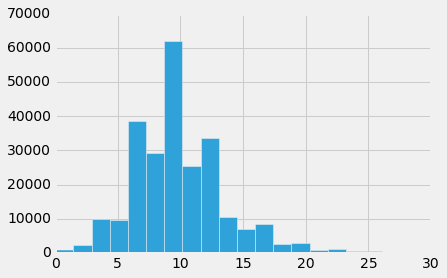

In [34]:
num_sections = np.array(list(map(lambda x: len(x[feat_name]), data)))
plt.hist(num_sections[num_sections < 30], 20);

0


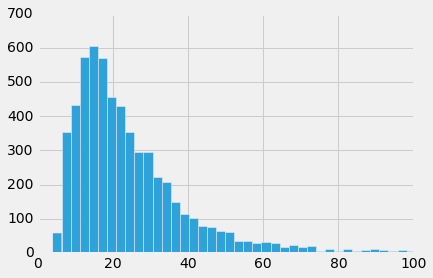

1


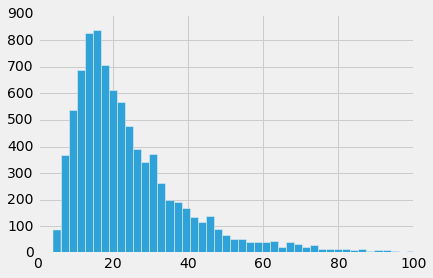

2


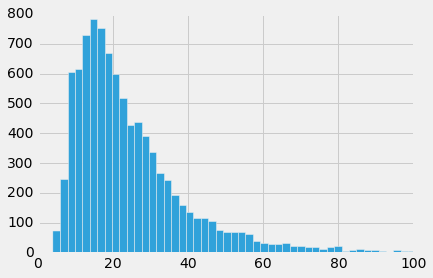

3


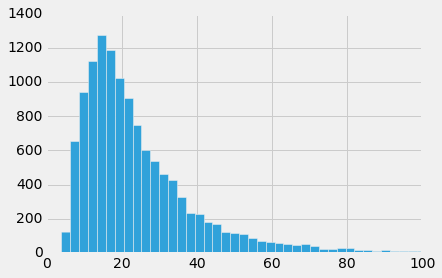

4


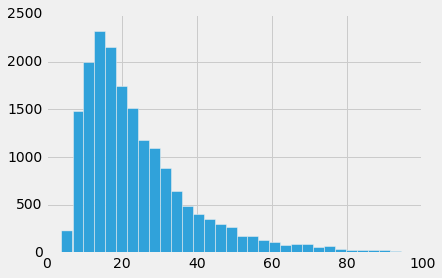

5


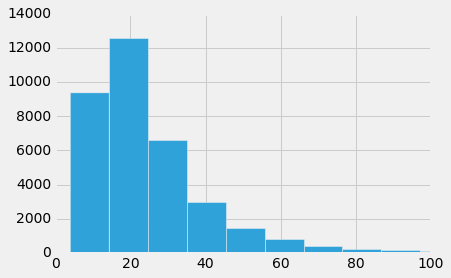

6


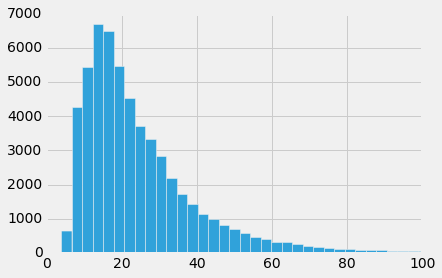

7


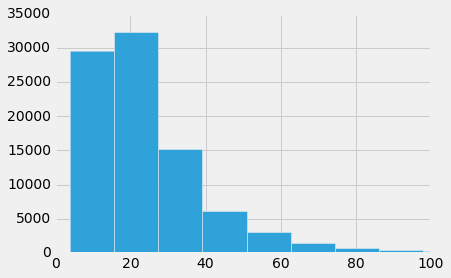

8


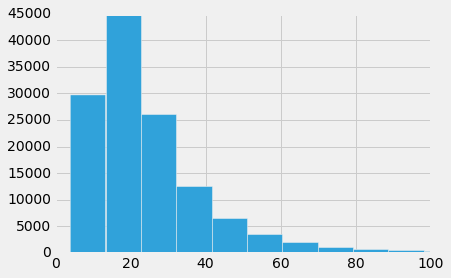

9


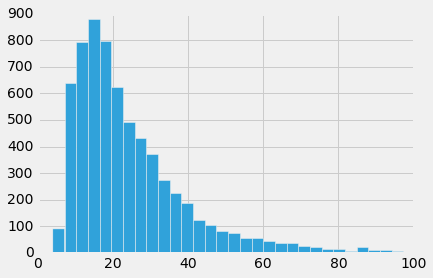

In [47]:
for cls in classes_to_data:
    section_lengths = list(map(lambda x: list(x['sections_gap']), classes_to_data[cls]))
    section_lengths = [item for sublist in section_lengths for item in sublist]
    print(cls)
    plt.xlim(xmax=100)
    plt.hist(section_lengths, 100);
    plt.show()

0


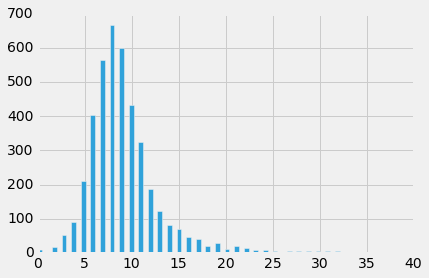

1


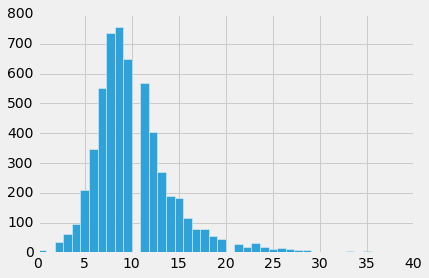

2


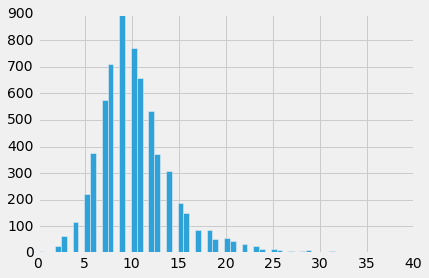

3


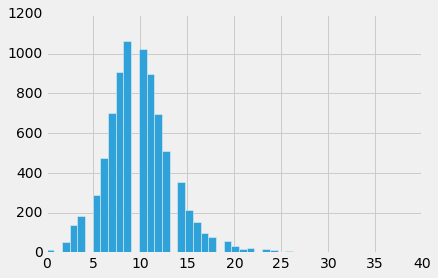

4


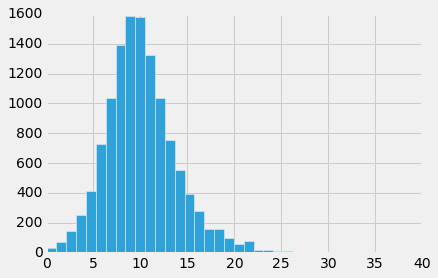

5


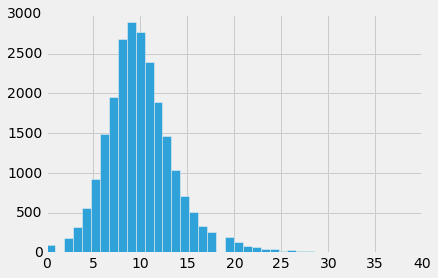

6


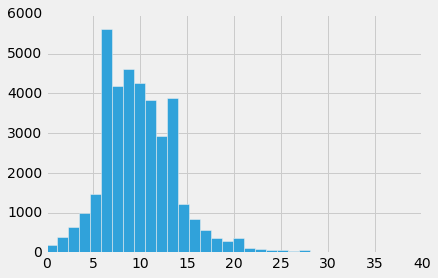

7


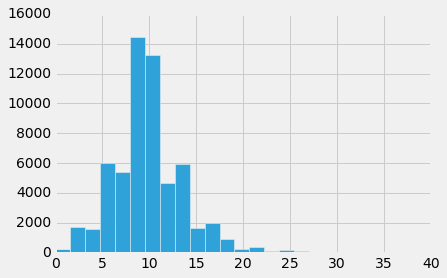

8


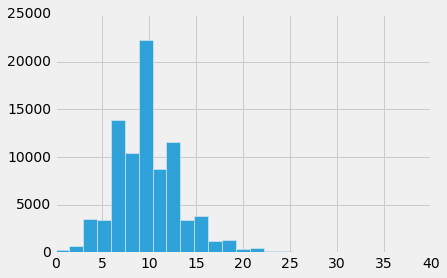

9


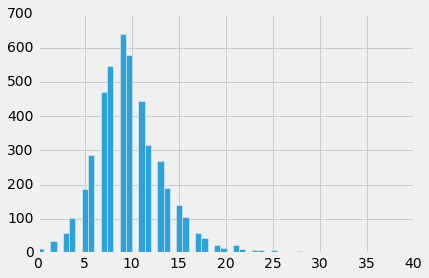

In [26]:
for cls in classes_to_data:
    num_sections = list(map(lambda x: len(x[feat_name]), classes_to_data[cls]))
    print(cls)
    plt.xlim(xmax=40)
    plt.hist(num_sections, 100);
    plt.show()

In [45]:
np.array(section_lengths)

array([ 16.6754 ,  35.58772,  15.38191, ...,  24.67312,  13.23886,
        13.62681])

/home/ubuntu/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


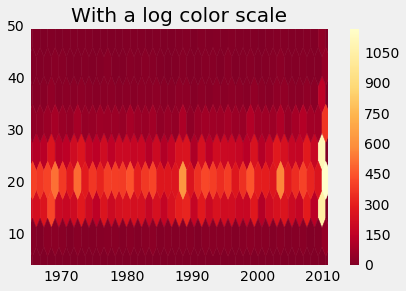

In [50]:
X = list(map(lambda x: x['year'], uniform_data))
Y = list(map(lambda x: np.median(x['sections_gap']), uniform_data))
#plt.ylim(ymax=2.5)
xmin = min(X)
ymin = min(Y)
xmax = max(X)
ymax = max(Y)

plt.hexbin(X, Y, bins=None, gridsize=40, cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
plt.ylim(ymax=50)

plt.show()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


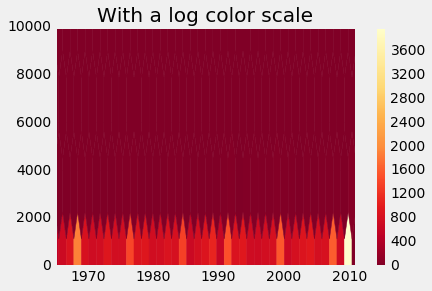

In [54]:
X = list(map(lambda x: x['year'], uniform_data))
Y = list(map(lambda x: np.var(x['sections_gap']), uniform_data))
plt.ylim(ymax=10000)
xmin = min(X)
ymin = min(Y)
xmax = max(X)
ymax = max(Y)

plt.hexbin(X, Y, bins=None, gridsize=40, cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
plt.ylim(ymax=10000)

plt.show()

In [57]:
for perc in np.linspace(0,100,11):
    print(perc)
    X = list(map(lambda x: x['year'], data))
    Y = list(map(lambda x: np.percentile(x['sections_gap'], perc), data))
    plt.ylim()
    xmin = min(X)
    ymin = min(Y)
    xmax = max(X)
    ymax = max(Y)

    plt.hexbin(X, Y, bins=None, gridsize=40, cmap=plt.cm.YlOrRd_r)
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title("With a log color scale")
    cb = plt.colorbar()
    #plt.ylim(ymax=2)

    plt.show()

0.0


IndexError: cannot do a non-empty take from an empty axes.

In [74]:
[x['sections_gap'] for x in data[550:560]]

[array([ 48.11233,  23.32614,  10.31864,  28.2632 ,  21.28849,  40.51199]),
 array([   4.09877,   17.89607,   11.37256,    8.52472,   70.77419,
         124.09809,   20.75607,   46.93359,   27.09344,   29.64173,
          26.48068,   23.75664,   19.84653,   34.62363,   11.54435,
          18.45257,   38.38231,   11.38263,   23.91705,    9.96163,
          16.32477,   29.32594,   12.5449 ,   34.66952,   22.81723,
          11.29987,   60.65923,   15.71174,   19.33352,   20.78186,
          17.66621,   38.71728,   13.87283,   12.78767,   31.07111,
          26.06267,   21.17379,   71.14304,    8.11492,   13.96272,
          38.23547,   10.31455,   19.01007,   37.57878,   42.33705,
          62.70122,   19.85252,   32.93179,   27.39157,   16.89188,
          17.39583,   34.80099,   27.21742,   15.71828,   10.6292 ,
          22.93415,   31.48254,   26.29333,   15.14268,   12.162  ,
          20.796  ,   19.26749,   22.158  ,   19.5913 ,   20.41269]),
 array([ 15.6432 ,   9.50978,  11.1941